### 1. AARRR

### 1-1 Acqusition

In [10]:
# 실습 준비 절차 1 :  Pandas, Numpy, Matplotlib, Seaborn 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 실습 준비 절차 2 : 가상의 데이터 생성
np.random.seed(42)
num_users = 200

# 실습 준비 절차 3 : Acquisition Channel 종류, User ID, signup Data 만들고, converted 수식만듬
channels = ['SEO', 'Paid Ads', 'Social Media', 'Email', 'Referral']

data = {
    'user_id': range(1, num_users + 1),
    'acquisition_channel': np.random.choice(channels, size=num_users, p=[0.3, 0.25, 0.2, 0.15, 0.1]),
    'signup_date': pd.date_range(start='2024-10-01', periods=num_users, freq='D'),
    'converted': np.random.choice([0, 1], size=num_users, p=[0.6, 0.4])  # 40% 전환율 가정
}

# 실습 준비 절차 4 :  데이터프레임 생성
df = pd.DataFrame(data)
df.head(3)

,user_id,acquisition_channel,signup_date,converted
0,1,Paid Ads,2024-10-01,1
1,2,Referral,2024-10-02,0
2,3,Social Media,2024-10-03,0


#### Q1) Acquisition 채널별 사용자 분석

채널별로 사용자가 몇 명 있는지?

In [11]:
# 2. Acquisition 채널별 사용자 수 분석.  Value count를 사용
channel_counts = df['acquisition_channel'].value_counts()
channel_counts

,count
acquisition_channel,
SEO,66
Paid Ads,50
Social Media,33
Email,32
Referral,19


In [12]:
# 2. Acquisition 채널별 사용자 수 분석.  groupby를 사용하는 방법
channel_counts = df.groupby('acquisition_channel').count()[['user_id']].sort_values('user_id', ascending = False)
channel_counts

,user_id
acquisition_channel,
SEO,66
Paid Ads,50
Social Media,33
Email,32
Referral,19


#### Q2) Acquisition 채널별 사용자수 분석 - 데이터 시각화

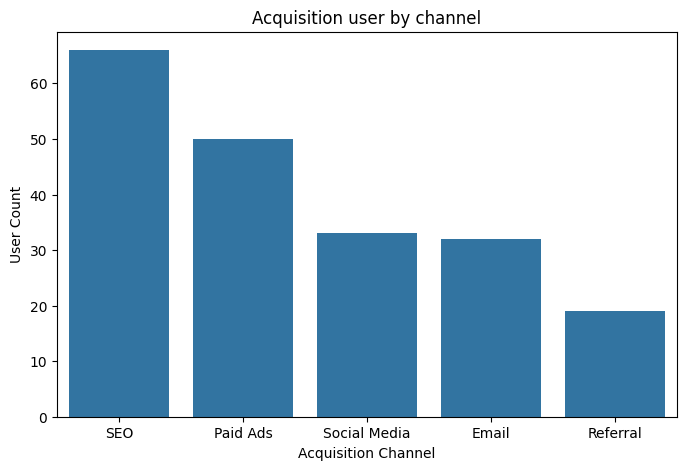

In [17]:
# 2. 데이터 시각화 - Acquisition 채널별 사용자 수를 bar chart 사용

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='acquisition_channel', order=channel_counts.index)
plt.title('Acquisition user by channel')
plt.xlabel('Acquisition Channel')
plt.ylabel('User Count')
plt.xticks(rotation=0)
plt.show()

#### Q3) Acquisition 채널별 전환율 분석

In [19]:
# 3. Acquisition 채널별 전환율 분석 : 전환자의 수 대상 mean 함수 사용
conversion_rate = df.groupby('acquisition_channel')['converted'].mean().round(2)
print("Acquisition 채널별 전환율:")
print(conversion_rate)

Acquisition 채널별 전환율:
acquisition_channel
Email           0.50
Paid Ads        0.34
Referral        0.26
SEO             0.53
Social Media    0.42
Name: converted, dtype: float64


#### Q4) Acqusition 채널별 전환율 분석 - 데이터 시각화

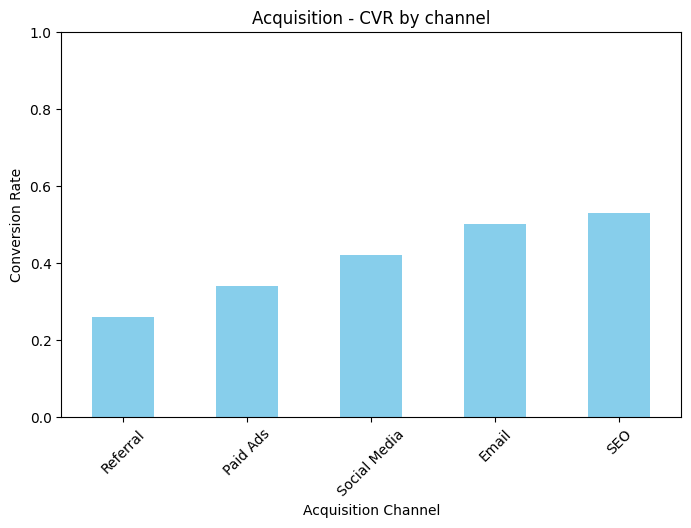

In [27]:
# 4. 데이터 시각화 - Acquisition 채널별 전환율
plt.figure(figsize=(8, 5))
conversion_rate.sort_values().plot(kind='bar', color='skyblue')
plt.title('Acquisition - CVR by channel')
plt.xlabel('Acquisition Channel')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

### 1-2. Activation

In [22]:
# 실습 준비 1 :  Pandas, Numpy, Matplotlib 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 실습 준비 2 : 가상의 데이터 생성 : user id, siignup date, first search date, purchase amount의 4개 data 만듦
np.random.seed(42)
num_users = 100
data = {
    'user_id': range(1, num_users + 1),
    'signup_date': pd.date_range(start='2024-10-01', periods=num_users, freq='D'),
    'first_search_date': pd.date_range(start='2024-10-02', periods=num_users, freq='D') + pd.to_timedelta(np.random.randint(0, 10, size=num_users), unit='D'),
    'purchase_amount': np.random.randint(0, 100000, size=num_users)
}

# 실습 준비 3 : data frame 생성
df = pd.DataFrame(data)
df.head(3)

,user_id,signup_date,first_search_date,purchase_amount
0,1,2024-10-01,2024-10-08,78603
1,2,2024-10-02,2024-10-06,52256
2,3,2024-10-03,2024-10-11,89135


#### Q5)  Activation 여부 컬럼 추가
- `is_activated` 컬럼: 조건: 첫 검색이 회원가입 후 7일 이내면 활성화로 간주
- `total_users` : 총 사용자수
- `activated_users`: 활성화된 사용자수
- `Activation Rate`: 활성화 %

In [25]:
# 1. Activation 여부 컬럼 추가 (첫 검색이 회원가입 후 7일 이내면 활성화로 간주)
df['is_activated'] = (df['first_search_date'] - df['signup_date']).dt.days <=7
df['is_activated']

,is_activated
0,True
1,True
2,False
3,True
4,True
...,...
95,False
96,False
97,True
98,False


In [29]:
# 2. Activation 지표 분석
total_users = len(df)
activated_users = df['is_activated'].sum()
activation_rate = activated_users / total_users

print(f"총 사용자 수: {total_users}")
print(f"Activation된 사용자 수: {activated_users}")
print(f"Activation Rate: {activation_rate:.2%}")

총 사용자 수: 100
Activation된 사용자 수: 62
Activation Rate: 62.00%


#### Q6) Activation 분석 - 데이터 시각화

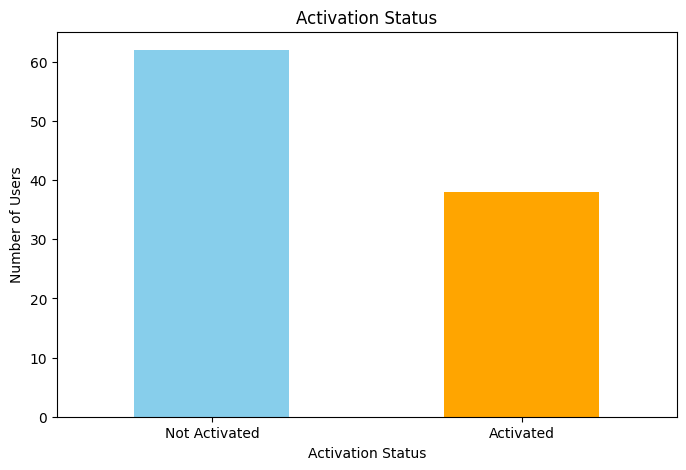

In [34]:
# Activation 분석 결과 시각화
plt.figure(figsize=(8, 5))
df['is_activated'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Activation Status')
plt.xticks(ticks=[0, 1], labels=['Not Activated', 'Activated'], rotation=0)
plt.ylabel('Number of Users')
plt.xlabel('Activation Status')
plt.show()

#### Q7) Activation된 사용자들의 구매 금액 분석
- Activation된 사용자의 평균 구매 금액(소수점 2째짜리)
- Activation되지 않은 사용자들의 평균 구매 금액(소수점 2째짜리)

In [35]:
# Activation된 사용자들의 구매 금액 분석

activate_df = df[df['is_activated'] == True]
non_active_df =  df[df['is_activated'] == False]

avg_purchase_activated = activate_df['purchase_amount'].mean()
avg_purchase_non_activated = non_active_df['purchase_amount'].mean()

print(f"Activation된 사용자의 평균 구매 금액: {avg_purchase_activated:.2f} 원")
print(f"Activation되지 않은 사용자의 평균 구매 금액: {avg_purchase_non_activated:.2f} 원")

Activation된 사용자의 평균 구매 금액: 55826.39 원
Activation되지 않은 사용자의 평균 구매 금액: 55457.42 원


==Google Colab 에서 data 불러오기 위해서 google Drive와 연결하는 방법==

1. 하기 코드 실행을 통해서 Colab - drive 연결하기
2. 데이터를 다운로드 받아서 구글 드라이브에 올리기
3. 2번에 해당하는 경로를 Colab 좌측 파일 탐색에서 찾아서 오른쪽 점세개 -> 경로복사
4. 밑에 코드에 적용하여서 데이터 불러오기

In [37]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/아이펠Data/events.csv')
df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy


### 1-3. Retention

cohort group 별 retention rate table & graph

- [kaggle 데이터셋: eCommerce events history](https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-electronics-store)
- [분석ref](https://medium.com/@davidjwilson93/unleashing-the-power-of-cohort-analysis-with-pandas-a-step-by-step-guide-3d3fffd7a487)
- [kaggle 데이터셋에서 데이터를 url로 가져오는 방법](https://velog.io/@tngus4334/kaggle-kaggle-API-%EC%84%B8%ED%8C%85%ED%95%98%EB%8A%94%EB%B2%95)

In [63]:
# 실습 준비 : kaggle data set 에서 data를 url로 가져옴
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mkechinov/ecommerce-events-history-in-electronics-store")
df = pd.read_csv(path + '/' + os.listdir(path)[0] )
df

100%|██████████| 20.3M/20.3M [00:00<00:00, 137MB/s]

Extracting files...


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ
...,...,...,...,...,...,...,...,...,...
885124,2021-02-28 23:55:01 UTC,view,953226,2144415927553229037,NaN,NaN,219.94,1515915625611023730,FRLqIttxKU
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd
885127,2021-02-28 23:58:14 UTC,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [64]:
# 실습 준비 2 :  original data set에서  무작취 추출해서 sample 만듬
df = df.sample(frac=0.1, random_state = 42)
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
192708,2020-11-01 14:36:11 UTC,view,4156279,2144415922587172973,electronics.telephone,NaN,12.22,1515915625533221908,krDzDYA6J0
43645,2020-10-04 13:48:49 UTC,view,1283611,2144415952391898012,appliances.environment.vacuum,bort,170.00,1515915625469806973,C8YU0DjTP8
148601,2020-10-25 06:27:19 UTC,view,3791351,2144415926966026460,computers.components.cpu,amd,204.29,1515915625530210252,GFm0pEaVjK
592601,2021-01-12 08:26:56 UTC,view,3957221,2144415922427789416,computers.components.videocards,asus,451.32,1515915625592186998,E57Elq8HVE
355859,2020-11-26 12:29:34 UTC,view,227145,2144415921085612102,NaN,NaN,13.00,1515915625544205939,jvqzdCSUUw
...,...,...,...,...,...,...,...,...,...
234610,2020-11-08 06:44:26 UTC,view,744519,2144415926185885895,construction.tools.drill,metabo,428.62,1515915625536912886,ExOsEvnWTr
353616,2020-11-26 05:29:04 UTC,cart,271031,2144415927158964449,NaN,NaN,1.57,1515915625543894256,Gf7VQ91zqu
286747,2020-11-15 18:16:09 UTC,view,849021,2144415924684325027,electronics.audio.headphone,hoco,16.03,1515915625539499115,91ZBiRh6ig
151311,2020-10-25 15:51:13 UTC,view,722717,2144415933727244688,computers.peripherals.printer,NaN,18.22,1515915625530397333,I0ePVvACua


- cohort index 만들기

1. event_time컬럼을 문자형으로 변경 2020-09-01 형태로 변환 후 current_month로 변경

2. 유저별 기준으로 집계하여 최소값으로 변경 -> 코호트 시작 날짜로 통일됨

3. 현재년도와 월에서 코호트 년월을 빼서 corhort_index를 생성

4. corhort_index: 코호트 시작일로부터 얼만큼 지났는지에 대한 가로축을 만들기 위한 기준

In [65]:
# 1. 날짜형 데이터 전처리 :  current_month 만들기
df['current_month'] = pd.to_datetime(df['event_time']).dt.year.map(str)+ '-' + pd.to_datetime(df['event_time']).dt.month.map(str) + '-' + '01'
df['current_month'] = pd.to_datetime(df['current_month']).dt.date

# 2. cohort_month로 유저별 기준 통일
df["cohort_month"] = df.groupby("user_id")["current_month"].transform("min")
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,current_month,cohort_month
192708,2020-11-01 14:36:11 UTC,view,4156279,2144415922587172973,electronics.telephone,NaN,12.22,1515915625533221908,krDzDYA6J0,2020-11-01,2020-11-01
43645,2020-10-04 13:48:49 UTC,view,1283611,2144415952391898012,appliances.environment.vacuum,bort,170.00,1515915625469806973,C8YU0DjTP8,2020-10-01,2020-10-01
148601,2020-10-25 06:27:19 UTC,view,3791351,2144415926966026460,computers.components.cpu,amd,204.29,1515915625530210252,GFm0pEaVjK,2020-10-01,2020-10-01
592601,2021-01-12 08:26:56 UTC,view,3957221,2144415922427789416,computers.components.videocards,asus,451.32,1515915625592186998,E57Elq8HVE,2021-01-01,2021-01-01
355859,2020-11-26 12:29:34 UTC,view,227145,2144415921085612102,NaN,NaN,13.00,1515915625544205939,jvqzdCSUUw,2020-11-01,2020-11-01
...,...,...,...,...,...,...,...,...,...,...,...
234610,2020-11-08 06:44:26 UTC,view,744519,2144415926185885895,construction.tools.drill,metabo,428.62,1515915625536912886,ExOsEvnWTr,2020-11-01,2020-11-01
353616,2020-11-26 05:29:04 UTC,cart,271031,2144415927158964449,NaN,NaN,1.57,1515915625543894256,Gf7VQ91zqu,2020-11-01,2020-11-01
286747,2020-11-15 18:16:09 UTC,view,849021,2144415924684325027,electronics.audio.headphone,hoco,16.03,1515915625539499115,91ZBiRh6ig,2020-11-01,2020-11-01
151311,2020-10-25 15:51:13 UTC,view,722717,2144415933727244688,computers.peripherals.printer,NaN,18.22,1515915625530397333,I0ePVvACua,2020-10-01,2020-10-01


In [66]:
# 3. current month에서 cohort month 빼기
def months_diff(df, col1, col2):
    current_month = pd.to_datetime(df[col1]).dt.month
    cohort_month = pd.to_datetime(df[col2]).dt.month
    return current_month - cohort_month

df['months_diff'] = months_diff(df, 'current_month', 'cohort_month')
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,current_month,cohort_month,months_diff
192708,2020-11-01 14:36:11 UTC,view,4156279,2144415922587172973,electronics.telephone,NaN,12.22,1515915625533221908,krDzDYA6J0,2020-11-01,2020-11-01,0
43645,2020-10-04 13:48:49 UTC,view,1283611,2144415952391898012,appliances.environment.vacuum,bort,170.00,1515915625469806973,C8YU0DjTP8,2020-10-01,2020-10-01,0
148601,2020-10-25 06:27:19 UTC,view,3791351,2144415926966026460,computers.components.cpu,amd,204.29,1515915625530210252,GFm0pEaVjK,2020-10-01,2020-10-01,0
592601,2021-01-12 08:26:56 UTC,view,3957221,2144415922427789416,computers.components.videocards,asus,451.32,1515915625592186998,E57Elq8HVE,2021-01-01,2021-01-01,0
355859,2020-11-26 12:29:34 UTC,view,227145,2144415921085612102,NaN,NaN,13.00,1515915625544205939,jvqzdCSUUw,2020-11-01,2020-11-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
234610,2020-11-08 06:44:26 UTC,view,744519,2144415926185885895,construction.tools.drill,metabo,428.62,1515915625536912886,ExOsEvnWTr,2020-11-01,2020-11-01,0
353616,2020-11-26 05:29:04 UTC,cart,271031,2144415927158964449,NaN,NaN,1.57,1515915625543894256,Gf7VQ91zqu,2020-11-01,2020-11-01,0
286747,2020-11-15 18:16:09 UTC,view,849021,2144415924684325027,electronics.audio.headphone,hoco,16.03,1515915625539499115,91ZBiRh6ig,2020-11-01,2020-11-01,0
151311,2020-10-25 15:51:13 UTC,view,722717,2144415933727244688,computers.peripherals.printer,NaN,18.22,1515915625530397333,I0ePVvACua,2020-10-01,2020-10-01,0


In [67]:
# 3. current year에서 cohort year 빼기
def years_diff(df, col1, col2):
    current_year = pd.to_datetime(df[col1]).dt.year
    cohort_year = pd.to_datetime(df[col2]).dt.year
    return current_year - cohort_year

df['years_diff'] = years_diff(df, 'current_month', 'cohort_month')
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,current_month,cohort_month,months_diff,years_diff
192708,2020-11-01 14:36:11 UTC,view,4156279,2144415922587172973,electronics.telephone,NaN,12.22,1515915625533221908,krDzDYA6J0,2020-11-01,2020-11-01,0,0
43645,2020-10-04 13:48:49 UTC,view,1283611,2144415952391898012,appliances.environment.vacuum,bort,170.00,1515915625469806973,C8YU0DjTP8,2020-10-01,2020-10-01,0,0
148601,2020-10-25 06:27:19 UTC,view,3791351,2144415926966026460,computers.components.cpu,amd,204.29,1515915625530210252,GFm0pEaVjK,2020-10-01,2020-10-01,0,0
592601,2021-01-12 08:26:56 UTC,view,3957221,2144415922427789416,computers.components.videocards,asus,451.32,1515915625592186998,E57Elq8HVE,2021-01-01,2021-01-01,0,0
355859,2020-11-26 12:29:34 UTC,view,227145,2144415921085612102,NaN,NaN,13.00,1515915625544205939,jvqzdCSUUw,2020-11-01,2020-11-01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234610,2020-11-08 06:44:26 UTC,view,744519,2144415926185885895,construction.tools.drill,metabo,428.62,1515915625536912886,ExOsEvnWTr,2020-11-01,2020-11-01,0,0
353616,2020-11-26 05:29:04 UTC,cart,271031,2144415927158964449,NaN,NaN,1.57,1515915625543894256,Gf7VQ91zqu,2020-11-01,2020-11-01,0,0
286747,2020-11-15 18:16:09 UTC,view,849021,2144415924684325027,electronics.audio.headphone,hoco,16.03,1515915625539499115,91ZBiRh6ig,2020-11-01,2020-11-01,0,0
151311,2020-10-25 15:51:13 UTC,view,722717,2144415933727244688,computers.peripherals.printer,NaN,18.22,1515915625530397333,I0ePVvACua,2020-10-01,2020-10-01,0,0


In [68]:
# 4. cohort index 만들기  year difference & month difference
def cohort_index(df, col1, col2):
    return df[col1] * 12 + df[col2]

df['cohort_index'] = cohort_index(df, 'years_diff', 'months_diff')
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,current_month,cohort_month,months_diff,years_diff,cohort_index
192708,2020-11-01 14:36:11 UTC,view,4156279,2144415922587172973,electronics.telephone,NaN,12.22,1515915625533221908,krDzDYA6J0,2020-11-01,2020-11-01,0,0,0
43645,2020-10-04 13:48:49 UTC,view,1283611,2144415952391898012,appliances.environment.vacuum,bort,170.00,1515915625469806973,C8YU0DjTP8,2020-10-01,2020-10-01,0,0,0
148601,2020-10-25 06:27:19 UTC,view,3791351,2144415926966026460,computers.components.cpu,amd,204.29,1515915625530210252,GFm0pEaVjK,2020-10-01,2020-10-01,0,0,0
592601,2021-01-12 08:26:56 UTC,view,3957221,2144415922427789416,computers.components.videocards,asus,451.32,1515915625592186998,E57Elq8HVE,2021-01-01,2021-01-01,0,0,0
355859,2020-11-26 12:29:34 UTC,view,227145,2144415921085612102,NaN,NaN,13.00,1515915625544205939,jvqzdCSUUw,2020-11-01,2020-11-01,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234610,2020-11-08 06:44:26 UTC,view,744519,2144415926185885895,construction.tools.drill,metabo,428.62,1515915625536912886,ExOsEvnWTr,2020-11-01,2020-11-01,0,0,0
353616,2020-11-26 05:29:04 UTC,cart,271031,2144415927158964449,NaN,NaN,1.57,1515915625543894256,Gf7VQ91zqu,2020-11-01,2020-11-01,0,0,0
286747,2020-11-15 18:16:09 UTC,view,849021,2144415924684325027,electronics.audio.headphone,hoco,16.03,1515915625539499115,91ZBiRh6ig,2020-11-01,2020-11-01,0,0,0
151311,2020-10-25 15:51:13 UTC,view,722717,2144415933727244688,computers.peripherals.printer,NaN,18.22,1515915625530397333,I0ePVvACua,2020-10-01,2020-10-01,0,0,0


- cohort group별 retention rate 구하고, table, graph 만들기

1. cohort_month, cohort_index별 user수 계산

2. cohort_month, cohort_index별 retenion rate 계산하기

3. cohort index table 만들기 : 최종 행렬을 생성

4. cohort index chart :  데이터 시각화

In [58]:
# 1. cohort_month, cohort_index별 user수 계산
cohort_counts = df.groupby(['cohort_month', 'cohort_index'])['user_id'].nunique()
cohort_counts_df = cohort_counts.to_frame().rename(columns={'user_id':'users'}).sort_values(by=['cohort_month'])
cohort_counts_df

users
cohort_month cohort_index       
2020-09-01   0              2439
             1                89
             2                27
             3                 8
             4                 9
             5                 5
2020-10-01   3                31
             2                63
             4                24
             0             13497
             1               185
2020-11-01   0             15454
             1               178
             2                71
             3                44
2020-12-01   0             12231
             1               182
             2                54
2021-01-01   1               275
             0             14368
2021-02-01   0             12721

In [60]:
# 2. cohort_month, cohort_index별 retenion rate 계산하기
cohort_counts_df ['retention_rate'] = cohort_counts_df['users'] / cohort_counts_df.groupby(["cohort_month"])["users"].transform("max")
cohort_counts_df

users  retention_rate
cohort_month cohort_index                       
2020-09-01   0              2439        1.000000
             1                89        0.036490
             2                27        0.011070
             3                 8        0.003280
             4                 9        0.003690
             5                 5        0.002050
2020-10-01   3                31        0.002297
             2                63        0.004668
             4                24        0.001778
             0             13497        1.000000
             1               185        0.013707
2020-11-01   0             15454        1.000000
             1               178        0.011518
             2                71        0.004594
             3                44        0.002847
2020-12-01   0             12231        1.000000
             1               182        0.014880
             2                54        0.004415
2021-01-01   1               275        0.019140
             0             14368        1.000000
2021-02-01   0             12721        1.000000

In [61]:
# 3. cohort index table 만들기 : 최종 행렬을 생성

cohort_counts = df.groupby(['cohort_month', 'cohort_index'])['user_id'].nunique()
cohort_counts_df = cohort_counts.to_frame().rename(columns={'user_id':'users'}).sort_values(by=['cohort_month'])
cohort_counts_df['retention_rate'] = cohort_counts_df['users'] / cohort_counts_df.groupby(["cohort_month"])["users"].transform("max")
cohorts_pivot = cohort_counts_df.pivot_table(index='cohort_month', columns = 'cohort_index', values = 'retention_rate')
cohorts_pivot

cohort_index,0,1,2,3,4,5
cohort_month,,,,,,
2020-09-01,1.0,0.036490,0.011070,0.003280,0.003690,0.00205
2020-10-01,1.0,0.013707,0.004668,0.002297,0.001778,NaN
2020-11-01,1.0,0.011518,0.004594,0.002847,NaN,NaN
2020-12-01,1.0,0.014880,0.004415,NaN,NaN,NaN
2021-01-01,1.0,0.019140,NaN,NaN,NaN,NaN
2021-02-01,1.0,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort_month'>

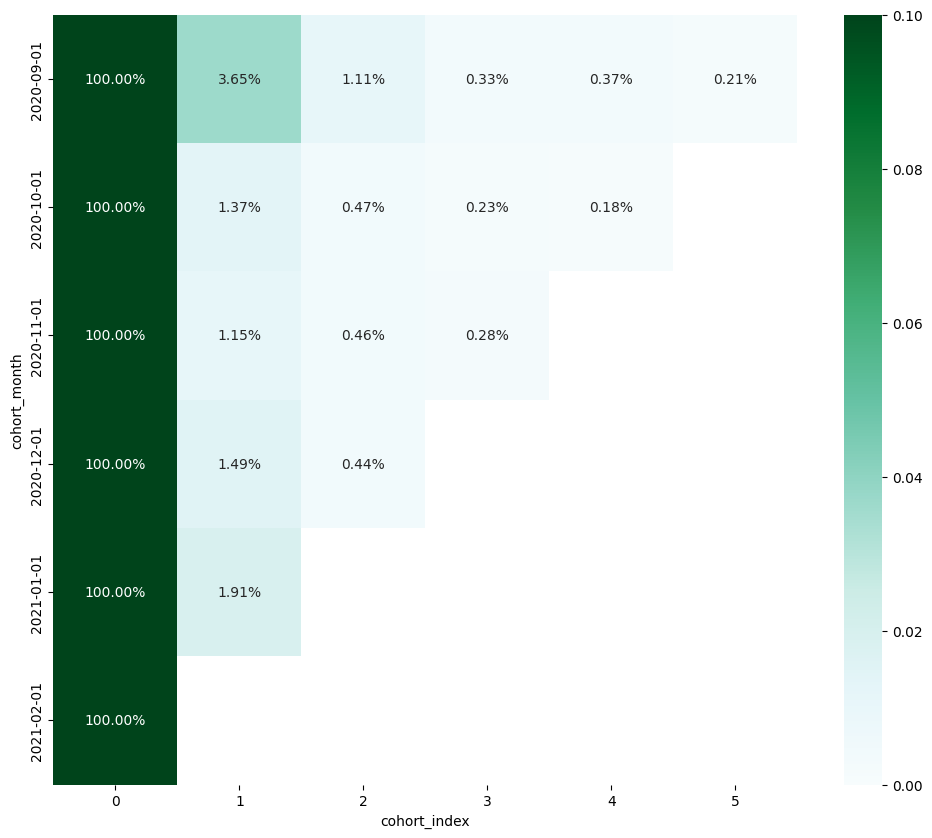

In [62]:
# 4. cohort index chart :  데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 10))
sns.heatmap(data = cohorts_pivot, annot = True, fmt = '.2%', vmin = 0.0, vmax = 0.1, cmap = 'BuGn')

### 1-4. Referral

In [70]:
# 실습 준비 1 : Pandas, Numpy 불러오기
import pandas as pd
import numpy as np

# 실습 준비 2 : 가상의 데이터 생성 : user id, referral source, referral code used, signup date, purchase amount 5가지
np.random.seed(42)
n_users = 1000
data = {
    'user_id': range(1, n_users + 1),
    'referral_source': np.random.choice(['Yes', 'No'], size=n_users, p=[0.3, 0.7]),
    'referral_code_used': np.random.choice(['Yes', 'No'], size=n_users, p=[0.4, 0.6]),
    'signup_date': pd.date_range(start='2024-01-01', periods=n_users, freq='D'),
    'purchase_amount': np.random.randint(0, 1000, size=n_users)
}

# 실습 준비 3 : 데이터프레임 생성
df = pd.DataFrame(data)
df.head(3)

,user_id,referral_source,referral_code_used,signup_date,purchase_amount
0,1,No,Yes,2024-01-01,219
1,2,No,No,2024-01-02,902
2,3,No,No,2024-01-03,162


#### Q8) 추천을 통해 유입된 사람의 비율을 분석
- 사용컬럼: `referral_source`

- referral source 가 Yes 인 행의 갯수를 세면 됨

In [73]:
# 내가 쓴 code
df['referral_source'].value_counts(normalize = True)*100

# 선생님 code
referral_count = df['referral_source'].value_counts(normalize=True) * 100
print("추천 유입 사용자 비율:")
print(referral_count)

추천 유입 사용자 비율:
referral_source
No     68.1
Yes    31.9
Name: proportion, dtype: float64


#### Q9) 추천 코드 사용 비율 분석
- 사용컬럼 `refferal_code_used`

- referral code used 가 yes인 행의 갯수를 세면 됨

In [75]:
# 2. 추천 코드 사용 비율 분석
referral_code_usage = df['referral_code_used'].value_counts(normalize = True)*100
print("\n추천 코드 사용 비율:")
print(referral_code_usage)


추천 코드 사용 비율:
referral_code_used
No     61.5
Yes    38.5
Name: proportion, dtype: float64


#### Q10) 추천 사용자의 구매 분석


In [82]:
# 3. 추천 사용자의 구매 금액 분석

referral_purchase = df[df['referral_source'] == 'Yes']['purchase_amount'].mean()
non_referral_purchase = df[df['referral_source'] == 'No']['purchase_amount'].mean()

print("추천 유입 사용자의 평균 구매 금액:", referral_purchase.round(3))
print("비추천 유입 사용자의 평균 구매 금액:", non_referral_purchase.round(3))

추천 유입 사용자의 평균 구매 금액: 513.549
비추천 유입 사용자의 평균 구매 금액: 531.107


### 1-5. Revenue
- CLV 계산하기
- [ref](https://github.com/hyunjoonbok/Python-Projects/blob/master/GeneralML/Cohort_Basket_Analysis/Measuring%20Customer%20Lifetime%20Value%20(LTV)%20in%20Python.ipynb)

In [83]:
# 실습 준비 1 :  data download the latest version
import kagglehub
import os

path = kagglehub.dataset_download("carrie1/ecommerce-data")
df = pd.read_csv(path + '/' +  os.listdir(path)[0], encoding='ISO-8859-1')
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Q11) CLV 계산하기

- CLV 계산방법: 고객의 평균 주문금액 * 평균구매 빈도 * (고객들의 방문일수)/365

- 절차
    - `CustomerID`의 결측행 제거
    - `InvoiceDate` 날짜형으로 변환
    - `TotalPrice` 컬럼 만들기(`Quantity` * `UnitPrice`)
    - CLV에 해당하는 컬럼 3가지 만들기(TotalPrice * 고객들의 방문일수)
    - 상위 10명 고객 출력
    - 전체 평균 CLV계산

In [86]:
#Customer ID 결측행 제거
df = df.dropna(subset = ['CustomerID'])
#InvoiceDate 날짜형으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#TotalPrice column 생성
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [90]:
#Customer Data table 새로 생성 :  5 column으로 CustomerID, InvoiceNo, TotalPrice, InvoiceDate_min, InvoiceDate_max
customer_data = df.groupby(['CustomerID']).agg({
    'InvoiceNo' : 'nunique',
    'TotalPrice' : 'sum',
    'InvoiceDate' :['min','max']
}).reset_index()
customer_data.head(3)

CustomerID InvoiceNo TotalPrice         InvoiceDate                    
               nunique        sum                 min                 max
0    12346.0         2       0.00 2011-01-18 10:01:00 2011-01-18 10:17:00
1    12347.0         7    4310.00 2010-12-07 14:57:00 2011-12-07 15:52:00
2    12348.0         4    1797.24 2010-12-16 19:09:00 2011-09-25 13:13:00

In [91]:
# column header 바꾸기
customer_data.columns = ['CustomerID', 'PurchaseFrequency', 'TotalRevenue', 'FirstPurchaseDate', 'LastPurchaseDate']
customer_data.head(3)

,CustomerID,PurchaseFrequency,TotalRevenue,FirstPurchaseDate,LastPurchaseDate
0,12346.0,2,0.00,2011-01-18 10:01:00,2011-01-18 10:17:00
1,12347.0,7,4310.00,2010-12-07 14:57:00,2011-12-07 15:52:00
2,12348.0,4,1797.24,2010-12-16 19:09:00,2011-09-25 13:13:00


In [97]:
# Customer Lifetime (얼만큼 기간을 지속했는가, unit은 day)
customer_data['lifetime'] = (customer_data['LastPurchaseDate'] - customer_data['FirstPurchaseDate']).dt.days

# Average Order Value (얼마치를 구매했는가?)   Purchase Frequency=구매빈도=InoivceNo. count data
customer_data['AverageOrderValue'] = customer_data['TotalRevenue'] / customer_data['PurchaseFrequency']

# Customer Lifetime Value 구하기
customer_data['CLV'] =  customer_data['AverageOrderValue'] * customer_data['PurchaseFrequency']* (customer_data['lifetime']/365)

In [98]:
customer_data.head(3)

,CustomerID,PurchaseFrequency,TotalRevenue,FirstPurchaseDate,LastPurchaseDate,lifetime,AverageOrderValue,CLV
0,12346.0,2,0.00,2011-01-18 10:01:00,2011-01-18 10:17:00,0,0.000000,0.000000
1,12347.0,7,4310.00,2010-12-07 14:57:00,2011-12-07 15:52:00,365,615.714286,4310.000000
2,12348.0,4,1797.24,2010-12-16 19:09:00,2011-09-25 13:13:00,282,449.310000,1388.552548


In [103]:
# CLV 상위 10명의 고객 출력
print("CLV 상위 10명의 고객")
print(customer_data[['CustomerID', 'CLV']].sort_values(by='CLV', ascending=False).head(10))

CLV 상위 10명의 고객
      CustomerID            CLV
1703     14646.0  270300.339890
4233     18102.0  257141.061205
3758     17450.0  184400.271315
1895     14911.0  135115.108603
1345     14156.0  112452.215562
55       12415.0  106098.810548
3801     17511.0   89332.576986
3202     16684.0   63725.765041
1005     13694.0   63339.709315
2192     15311.0   60721.681699


In [102]:
# 전체 평균 CLV 계산
customer_data['CLV'].mean()

np.float64(1397.585753100678)

#### Q12) 히스토그램 시각화하기

- 히스토그램 그리기
- 데이터는 고객의 CLV 컬럼
- plt.xlim(0,5000)으로 하여 제한

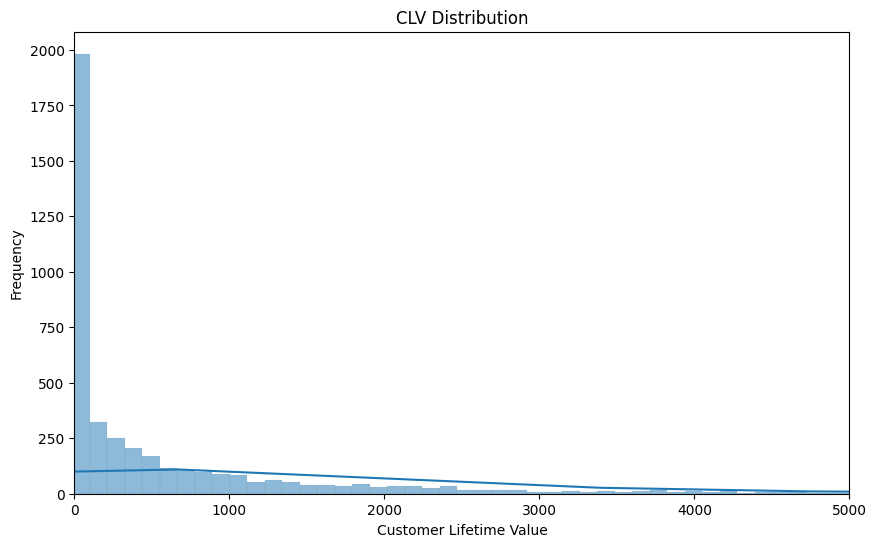

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(customer_data['CLV'],kde=True)
plt.title('CLV Distribution')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.xlim(0,5000)
plt.show()

## 2. 기본분포

#### 균등분포
- 0과 1사이의 균등분포 10개 생성
- 함수명: uniform.rvs
- `rvs`함수: Random Variated Sampling의 약자로 표본데이터를 사용하는 기능으로 사용( Numpy.random 모듈과 같은 존재)

In [107]:
from scipy.stats import uniform

# 균등 분포 생성 (예시: 0에서 1 사이)
uniform_dist = uniform.rvs(size=10, loc=0, scale=1)

# 결과 출력 (선택 사항)
uniform_dist

array([0.14285029, 0.75342792, 0.76892278, 0.65854052, 0.76611593,
       0.84592144, 0.61360411, 0.08860471, 0.48762781, 0.07764933])

### 2. 베르누이분포
- 동전을 10번 던져서 나오는 앞면의 데이터수

In [108]:
from scipy.stats import bernoulli

# p는 성공 확률 (0과 1 사이)
p = 0.5

# size는 생성할 샘플의 개수
size = 10

# 베르누이 분포 샘플 생성
samples = bernoulli.rvs(p, size=size)

samples

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1])

### 3. 이항분포
- 동전 3번을 던졌을때 2번이 앞면이 나오는 경우를 확률계산해봅시다.

In [109]:
from scipy.stats import binom

# n: 시행 횟수 (동전 3개 던지기)
# p: 성공 확률 (앞면이 나올 확률, 0.5로 가정)
# k: 성공 횟수 (앞면이 2개 나올 경우)

n = 3
p = 0.5
k = 2

# 이항 분포 확률 계산
probability = binom.pmf(k, n, p)

print(f"동전 3개를 던졌을 때 앞면이 2개, 뒷면이 1개 나올 확률: {probability}")

동전 3개를 던졌을 때 앞면이 2개, 뒷면이 1개 나올 확률: 0.3750000000000001


### 4. 정규분포
- SAT점수는 평균이 1150점이고 표준편차가 150점이다. 그러면 1380점을 맞은 임정은 상위 몇퍼센트인가?

In [110]:
from scipy.stats import norm

# 1380점에 대한 백분율 계산
percentile = norm.cdf(1380, loc=1150, scale=150) * 100

print(f"SAT 점수 1380점의 백분율은 약 {percentile:.2f}% 입니다.")

SAT 점수 1380점의 백분율은 약 93.74% 입니다.


### Q13) 균등분포 문제
- 어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다.
고객 100명이 대기한 시간을 시뮬레이션하고, 평균 대기시간과 표준편차를 계산하세요.

In [112]:
import numpy as np

# 시뮬레이션
from scipy.stats import uniform

user_count = 100
waiting_times = uniform.rvs(loc=5, scale=10, size=user_count, random_state=0 )
print(np.shape(waiting_times))

# 평균과 표준편차 계산
mean_waiting_time = np.mean(waiting_times)
std_waiting_time = np.std(waiting_times, ddof=1)

print(f"평균 대기시간: {mean_waiting_time:.2f}")
print(f"표준편차: {std_waiting_time:.2f}")


(100,)
평균 대기시간: 9.73
표준편차: 2.90


### Q14) 베르누이 분포 문제
- 한 신제품의 초기 성공 확률이 0.3이라고 가정합니다.
10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력하세요.

In [113]:
from scipy.stats import bernoulli

# 성공 확률과 시행수 정의
p = 0.3
n = 10

# 베르누이 분포 샘플 생성
outcomes = bernoulli.rvs(p, size=n)
success_count = outcomes.sum()

print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")

각 시도 결과: [0 0 0 1 1 0 0 0 0 0]
성공 횟수: 2


### Q15) 이항분포 문제
- 한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치릅니다.
각 문제의 정답 확률은 0.7이라고 가정할 때, 각 학생이 맞힌 점수를 시뮬레이션하고, 전체 학생의 평균 점수를 계산하세요.

In [114]:
from scipy.stats import binom

# 이항 분포: 문제 수 , 정답확률, 학생 수
num_of_stds = 20
num_of_quizzes = 5
percent = 0.7

# 각 학생의 점수 시뮬레이션
scores = binom.rvs(num_of_quizzes, p = percent, size=num_of_stds, random_state=0)
average_score = np.mean(scores)

print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")

학생별 점수: [3 3 3 3 4 3 4 2 2 4 3 3 3 2 5 5 5 3 3 2]
평균 점수: 3.25


### Q16) 정규분포 문제
- 한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다.1000개의 제품 무게를 시뮬레이션하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산하세요. 무게 분포의 히스토그램을 그리세요.

- `weights`: 샘플 생성하여 저장하는 자료형 변수

In [115]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# 정규 분포 파라미터: 평균, 표준편차, 데이터 샘플 수
mu = 50
sigma = 5
num_of_samples = 1000

# 샘플 생성
weights = norm.rvs(loc=mu, scale=sigma, size=num_of_samples, random_state=0)
print(np.shape(weights))

# 45g 이상 55g 이하의 비율 계산
conds = (weights >= 45) & (weights <=55)
print(np.shape(weights[conds]))

within_range = len(weights[conds]) / len(weights)
print(f'45g 이상 55g 이하의 비율 계산: {within_range:.2f}')

(1000,)
(699,)
45g 이상 55g 이하의 비율 계산: 0.70


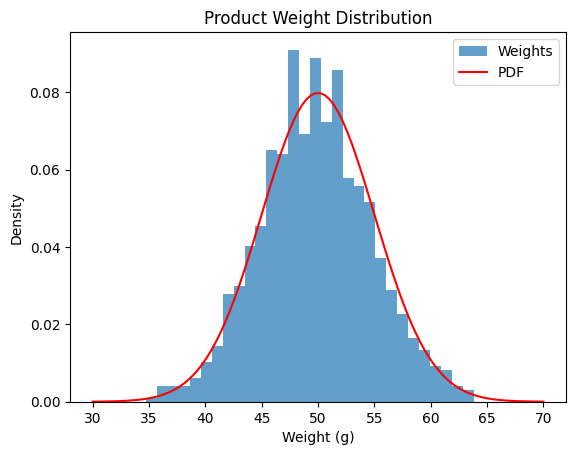

45g 이상 55g 이하 비율: 69.90%


In [116]:
# 히스토그램 그리기
plt.hist(weights, bins=30, density=True, alpha=0.7, label="Weights")
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label="PDF")
plt.xlabel("Weight (g)")
plt.ylabel("Density")
plt.title("Product Weight Distribution")
plt.legend()
plt.show()

print(f"45g 이상 55g 이하 비율: {within_range:.2%}")

45g 이상 55g 이하의 비율 = 평균이  μ=50 에서  μ−1∗σ 와  μ+1∗σ  사이의 비율. 정규분포에서 이 비율은 약 34.1%*2=68.2%인데, 정규분포로 샘플링한 데이터에서도 비슷한 비율로 나옴을 확인할 수 있다.